In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1.  Exploratory Data Analysis (EDA)

In [4]:
data=pd.read_excel("glass.xlsx", sheet_name="glass")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
# there is no null values in the dataset so no need to handle with the null values

In [8]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
data.drop_duplicates(inplace=True)

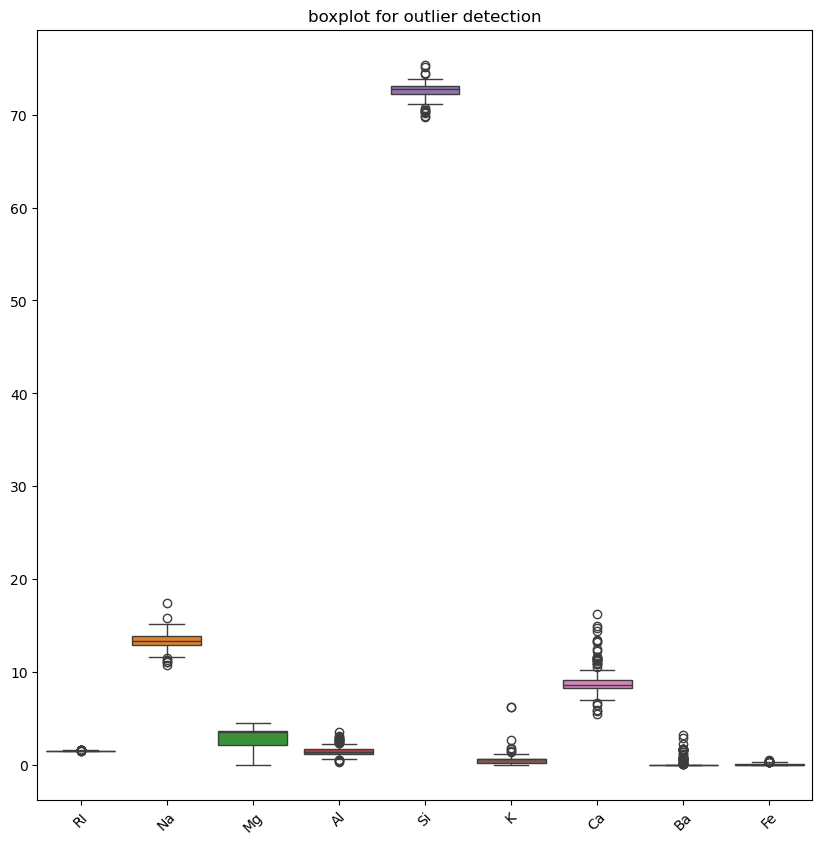

In [15]:
# outlier detection using boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=data.iloc[:,:-1])
plt.title("boxplot for outlier detection")
plt.xticks(rotation=45)
plt.show()

In [16]:
# it is clear that all the features have outliers and mainly Ca, Ba, Si have lots of outliers and are highly skewed


### 2. Data Visualization

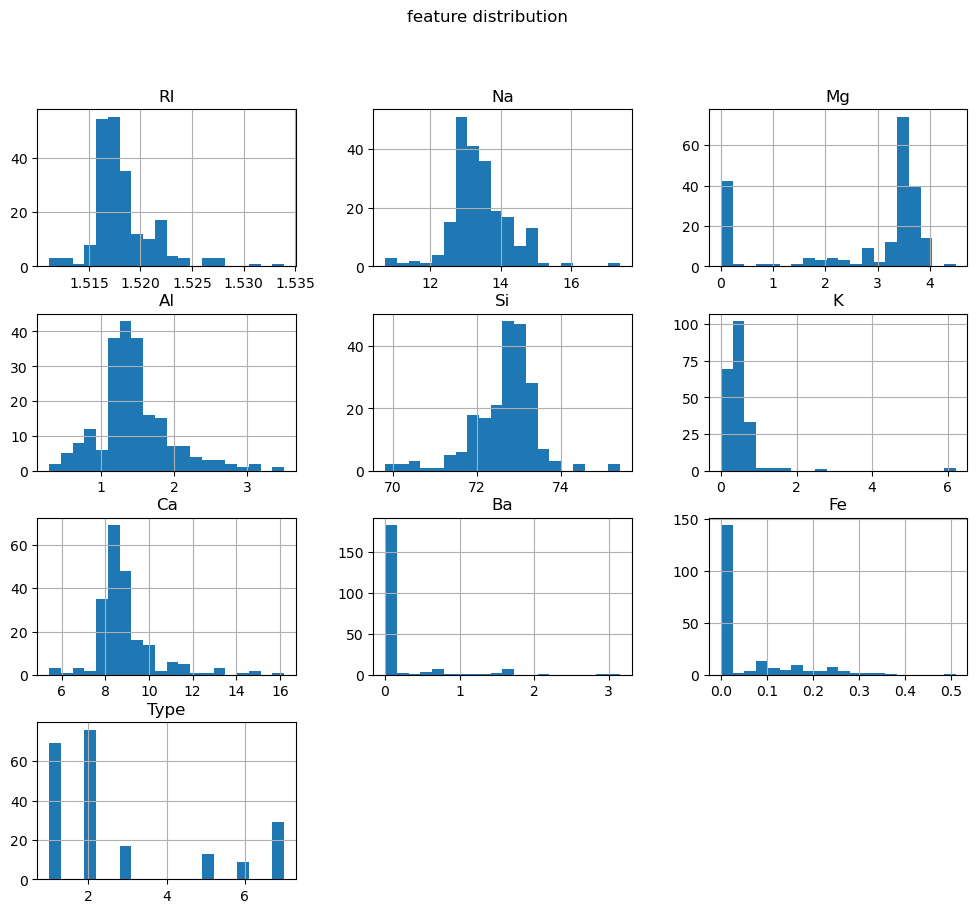

In [22]:
#histogram visualization
data.hist(figsize=(12,10), bins=20)
plt.suptitle("feature distribution", fontsize=12)
plt.show()

<Figure size 1500x1500 with 0 Axes>

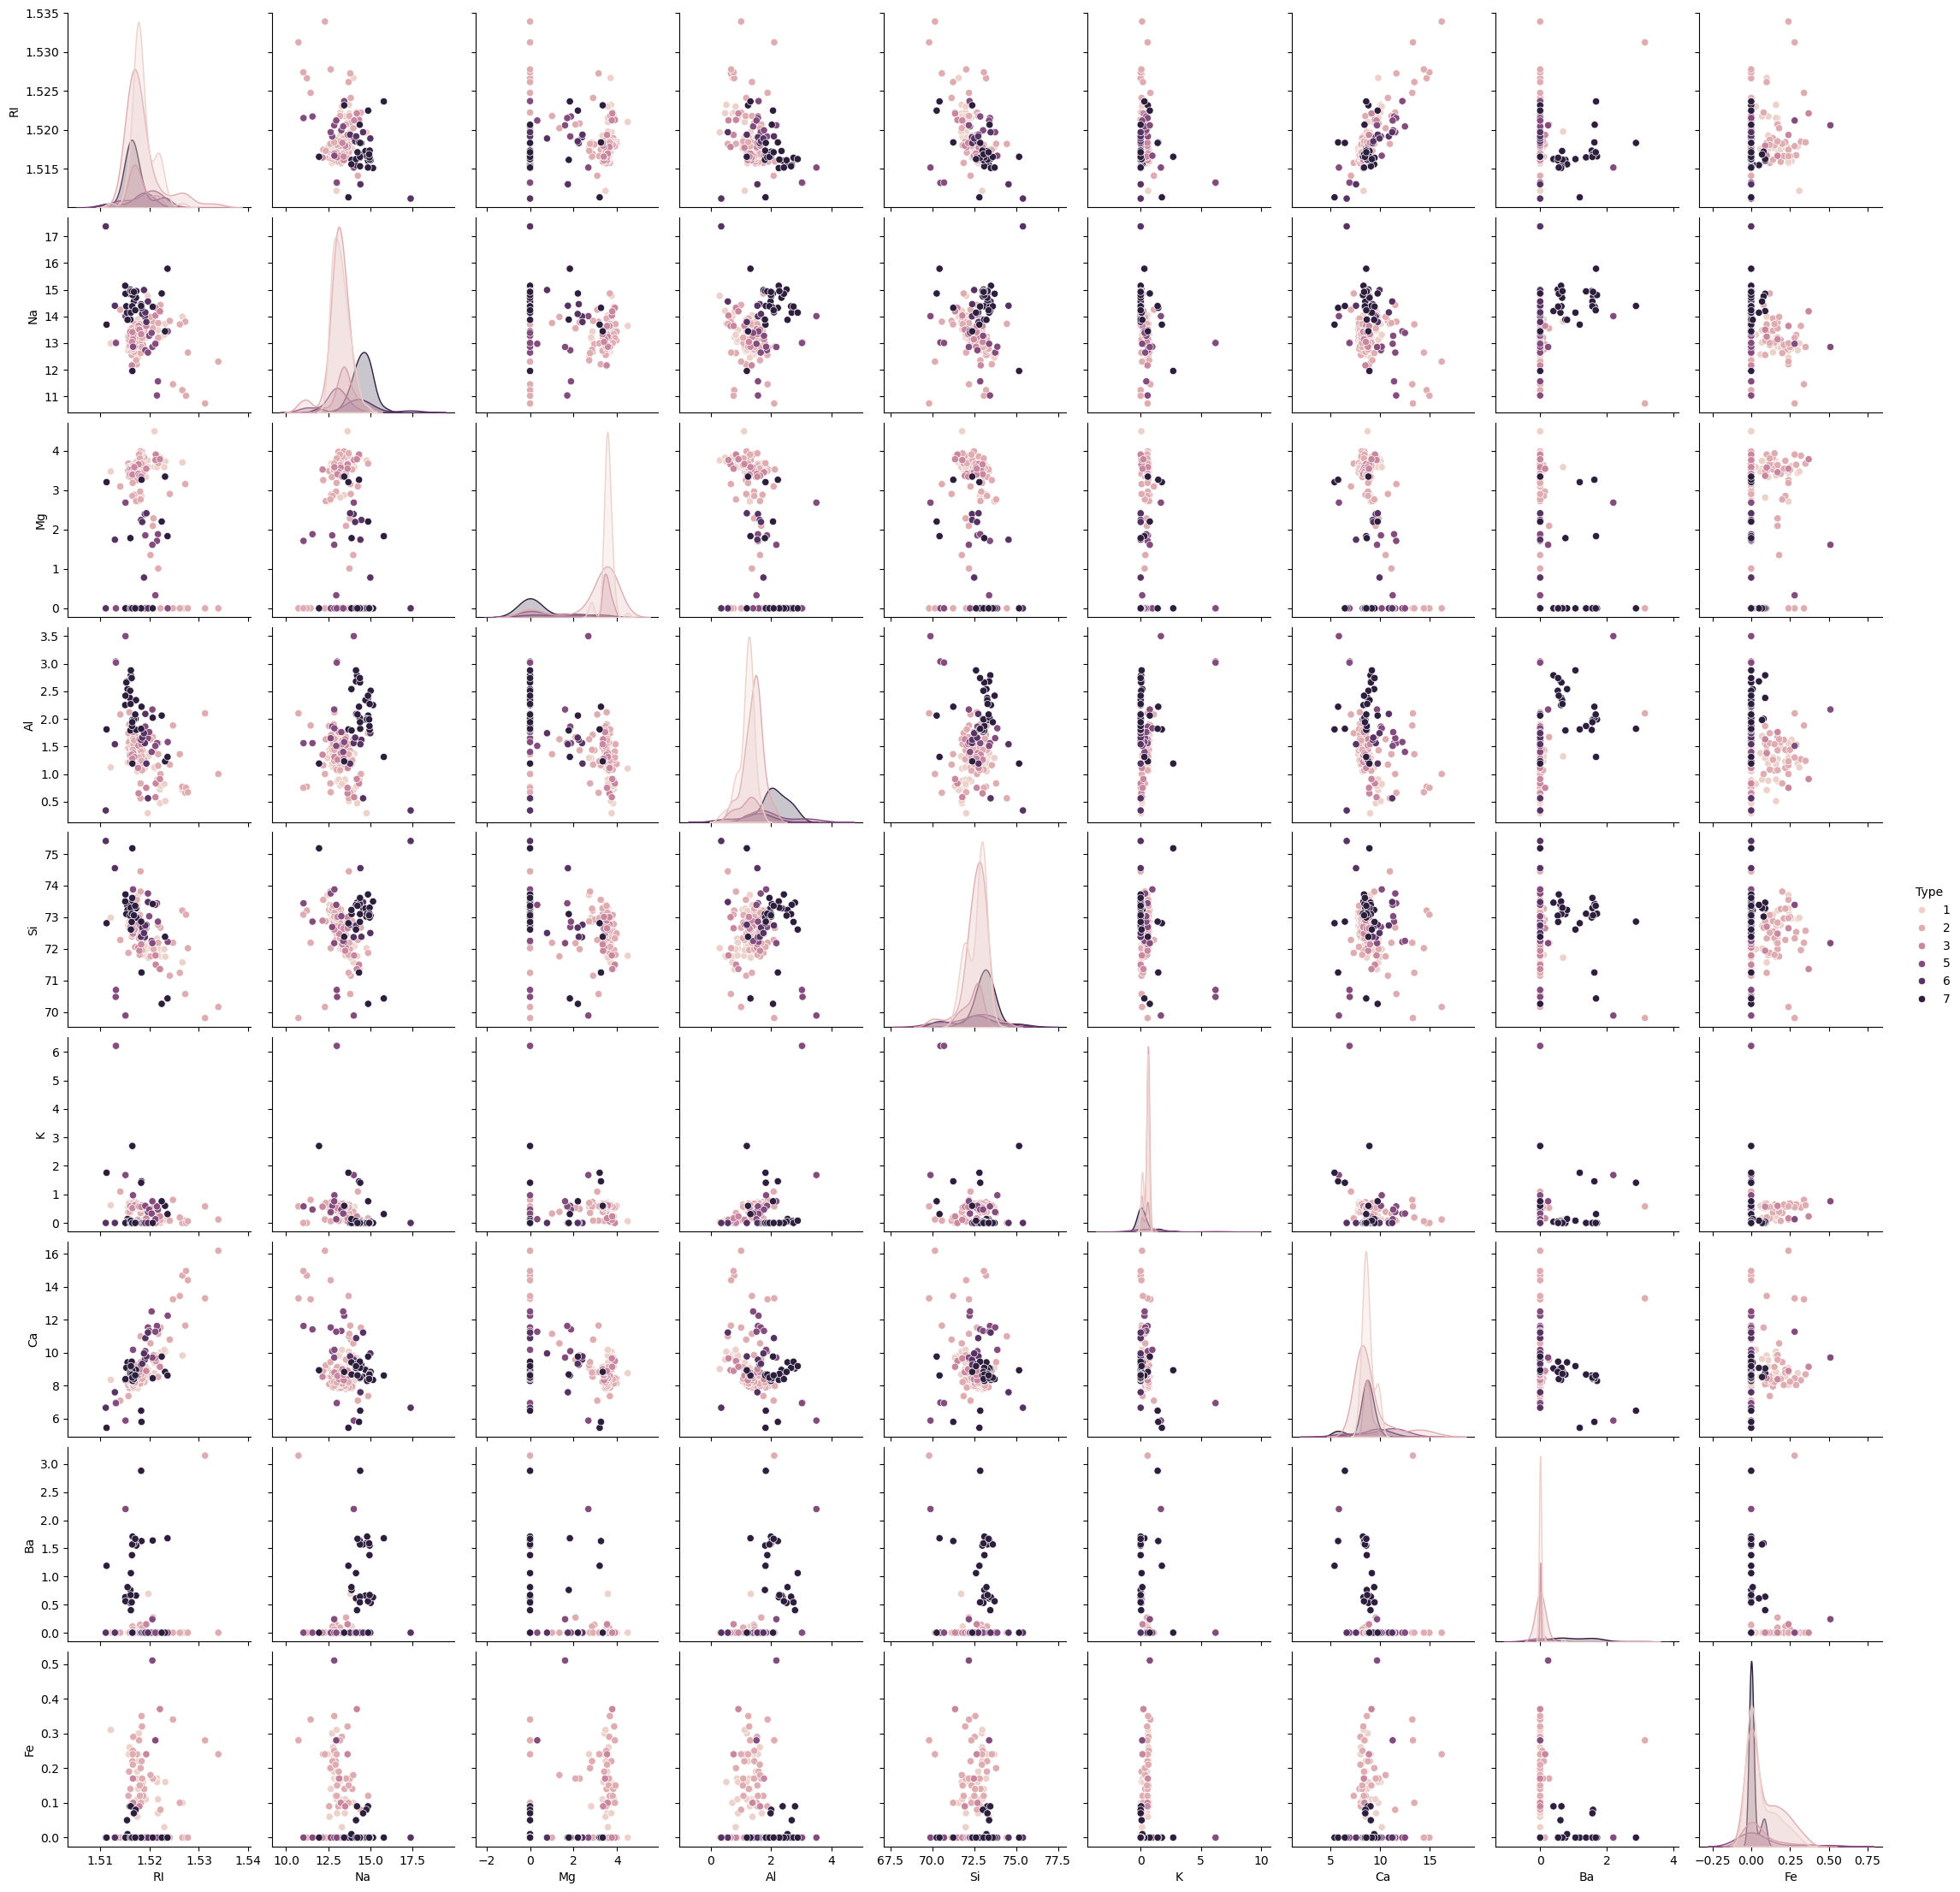

In [25]:
# pairplot visualization
plt.figure(figsize=(15,15))
sns.pairplot(data, hue='Type')
plt.show()

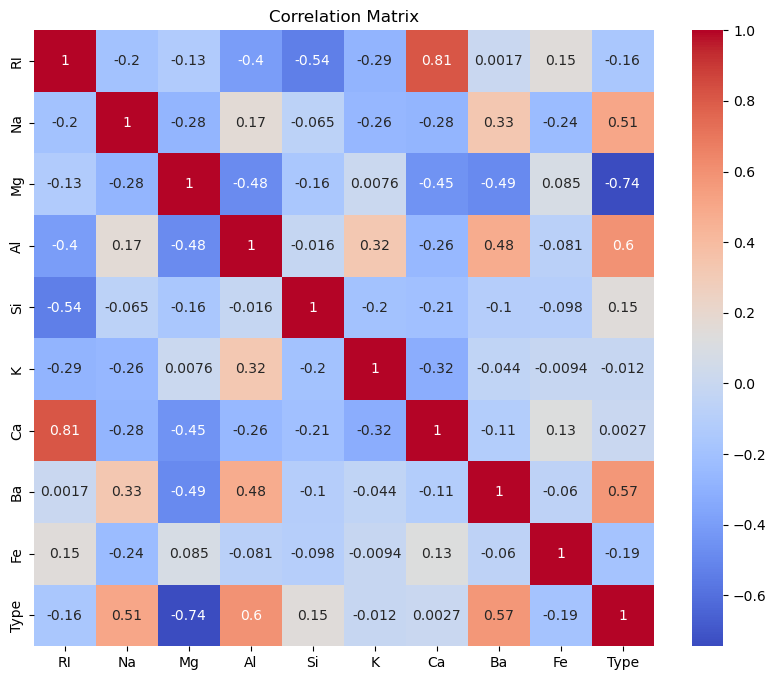

In [26]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

##### from the histogram the  Mg is highly skewed along with Ca , Fe and Ba is also highly skewed.
##### from the heatmap the Type is highly correlated with Mg, Al, Ba and Na.
##### there is also high correlation between Ca and RI, Ba and Al

### 3. Data Preprocessing

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
x=data.drop("Type", axis=1)
y=data['Type']

In [31]:
#scaling of data
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [32]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

### 4. Random Forest Model Implementation

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
#prediction
y_pred=rf.predict(x_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.93      0.87        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.83      0.83      0.82        43
weighted avg       0.85      0.84      0.84        43

Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 2 11  0  1  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Accuracy Score:
 0.8372093023255814


##### we have built the randomforest method which is a bagging technique. we have obtained 84% accuracy and hence the model built is a good model

### 5. Boosting

In [46]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100, random_state=42)
abc.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [47]:
yhat_pred=abc.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat_pred))
print("Accuracy Score:\n", accuracy_score(y_test, yhat_pred))

Confusion Matrix:
 [[12  2  0  0  0  0]
 [ 7  6  0  0  2  0]
 [ 3  0  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  3  0  0  0  3]]
Accuracy Score:
 0.5348837209302325


##### we can see that the accuracy is just 54% and thus it is not a good model. on comparing the boosting technique is much better than the bagging technique

##### 1. bagging works in the concept of starting with the dataset having high variance and low bias. Subsets of the dataset are taken and are trained with different models and the final output is obtained from aggregate function. The resultant output will have low variance. Random Forest follows bagging
##### Boosting starts with the base model having high bias and low variance and ends up with the model having low bias and low variance. All the models are dependent on each other and it works with the error propagation.

##### 2. unbalanced data can be overcome by 1. Resampling the Dataset which includes undersampling and oversampling which reduce or increase minority class. 2. we can use SMOTE technique